<a href="https://colab.research.google.com/github/handetushar/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airline Passenger Referral Prediction**

## **Problem Statement**
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. 
The main objective is to predict whether passengers will refer the airline to their friends.

## **Data Description**
Feature descriptions briefly as follows:<br>
airline: Name of the airline.<br>
overall: Overall point is given to the trip between 1 to 10.<br>
author: Author of the trip<br>
reviewdate: Date of the Review customer review: Review of the customers in free text format<br>
aircraft: Type of the aircraft<br>
travellertype: Type of traveler (e.g. business, leisure)<br>
cabin: Cabin at the flight date flown: Flight date<br>
seatcomfort: Rated between 1-5<br>
cabin service: Rated between 1-5<br>
foodbev: Rated between 1-5 entertainment: Rated between 1-5<br>
groundservice: Rated between 1-5<br>
valueformoney: Rated between 1-5<br>
recommended: Binary, target variable.

## Importing dependencies

In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from datetime import *

from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')


## Importing the dataframe.

In [2]:
df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Projects/Supervised ML Classification/data_airline_reviews.xlsx')

In [3]:
#Make a copy of our original dataset to protect it from any permanent changes.
airlines_df = df.copy()

In [4]:
# display first five rows
airlines_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check the shape of the dataset
airlines_df.shape

(131895, 17)

As we can see our data have **131895 instances** and **17 features**.

In [6]:
#Column names of the dataset
airlines_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [7]:
#Check info of dataset
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

*  By examining the info() method, we can see that there are **131895** rows in total and that the maximum number of non-NaN values is only 65947, indicating that every odd row is a NaN.

*   We next considered removing all odd rows from the dataset, however we realized later that the dataset's end still contained NaN rows.

In [8]:
#Check the null value count for each column
airlines_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

In [9]:
#Define a function for Null-Values in percentage form.
def missing_values_per_check(df):
    percent_missing = airlines_df.isnull().sum() * 100 / len(airlines_df)
    missing_values_df = pd.DataFrame({'column_name': airlines_df.columns,
                                     'percent_missing': percent_missing})
    missing_values = missing_values_df.sort_values('percent_missing',ascending=False)
    idx = missing_values.reset_index(drop = 'index',inplace = True)
    return missing_values

In [10]:
#Null-values in percentage before removal.
missing_values_per_check(airlines_df)

,column_name,percent_missing
0,aircraft,85.050229
1,ground_service,70.159597
2,date_flown,69.951097
3,route,69.880587
4,traveller_type,69.858600
5,entertainment,66.493802
6,food_bev,60.113727
7,seat_comfort,53.992949
8,cabin_service,53.967171
9,cabin,52.005004


In [11]:
# Drooping Null values if the complete row is empty
airlines_df.dropna(axis=0, how='all', inplace=True)
#Reset index of Dataframe.
airlines_df.reset_index(drop= 'index', inplace = True)

In [12]:
# size of the dataset after dropping the null rows
airlines_df.shape

(65947, 17)

In [13]:
airlines_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
1,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
2,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
3,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
4,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


In [14]:
#Check duplicates
value=len(airlines_df[airlines_df.duplicated()])
print("\033[1mThe number of duplicate values in the data set is\033[0m : ",value)

The number of duplicate values in the data set is :  4764


In [15]:
airlines_df.drop_duplicates(inplace= True)

In [16]:
airlines_df.duplicated().sum()

0

In [17]:
#Modify the date flown column
airlines_df['date_flown']= pd.to_datetime(airlines_df.date_flown)

In [18]:
#New columns month , day and  year added to dataset
for df in [airlines_df]:
    airlines_df['month'] = airlines_df['date_flown'].dt.month
    airlines_df['year'] = airlines_df['date_flown'].dt.year
    airlines_df['day'] = airlines_df['date_flown'].dt.day

In [19]:
#Drop original date flown column
airlines_df.drop('date_flown', axis=1 , inplace= True)

In [20]:
#Check info after cleaning the dataset
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 0 to 65946
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   seat_comfort     56211 non-null  float64
 10  cabin_service    56240 non-null  float64
 11  food_bev         48341 non-null  float64
 12  entertainment    40230 non-null  float64
 13  ground_service   37169 non-null  float64
 14  value_for_money  59327 non-null  float64
 15  recommended      59761 non-null  object 
 16  month            37434 non-null  float64
 17  year        

In [21]:
#Checking the number of unique values in each columns.
uniq = dict(airlines_df.nunique())
uniq

{'airline': 81,
 'overall': 10,
 'author': 44069,
 'review_date': 3015,
 'customer_review': 61172,
 'aircraft': 2088,
 'traveller_type': 4,
 'cabin': 4,
 'route': 24549,
 'seat_comfort': 5,
 'cabin_service': 5,
 'food_bev': 5,
 'entertainment': 5,
 'ground_service': 5,
 'value_for_money': 5,
 'recommended': 2,
 'month': 12,
 'year': 7,
 'day': 1}

In [22]:
#Getting the number of unique values of some categorical variables with their counts.
for var in uniq :
  if (uniq[var]) <= 10:
    print(f'The column \033[1m\033[4m{var}\033[0m has unique values :\n{airlines_df[var].value_counts()}\n', '-'*50)

The column overall has unique values :
1.0     16103
10.0     8025
9.0      7363
8.0      6705
2.0      5491
7.0      4215
3.0      3741
5.0      2924
6.0      2436
4.0      2398
Name: overall, dtype: int64
 --------------------------------------------------
The column traveller_type has unique values :
Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64
 --------------------------------------------------
The column cabin has unique values :
Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64
 --------------------------------------------------
The column seat_comfort has unique values :
1.0    13908
4.0    13485
3.0    11358
5.0     9834
2.0     7626
Name: seat_comfort, dtype: int64
 --------------------------------------------------
The column cabin_service has unique values :
5.0    17267
1.0    13577
4.0    10553
3.0     8171
2.0   

As per above results we can observe:
* The number of unique values present in dataset and the target variable has balanced data.
* The day variable has only single value in it, therefore this column may be dropped.


In [23]:
#Get some statical information of numerical as well as categorical columns
airlines_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,61183,81,Spirit Airlines,2871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,59401.0,NaN,NaN,NaN,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
author,61183,44069,Anders Pedersen,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_date,61183,3015,19th January 2015,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_review,61183,61172,I flew from Chicago O'Hare to Dublin and from ...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aircraft,18488,2088,A320,2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveller_type,37540,4,Solo Leisure,13935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cabin,58705,4,Economy Class,45171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,37513,24549,BKK to LHR,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seat_comfort,56211.0,NaN,NaN,NaN,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0


# **EDA(Exploratory Data Analysis)**:

In [24]:
#Assign numerical features.
numerical_features = airlines_df.select_dtypes(include=['int64','float64'])
numerical_features.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'month', 'year', 'day'],
      dtype='object')

In [25]:
#Assign categorical features.
categorical_features = airlines_df.select_dtypes(include=['object'])
categorical_features.columns

Index(['airline', 'author', 'review_date', 'customer_review', 'aircraft',
       'traveller_type', 'cabin', 'route', 'recommended'],
      dtype='object')

## **Univariate Analysis**

In [26]:
#We define a function to implement Univariate Analysis.
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

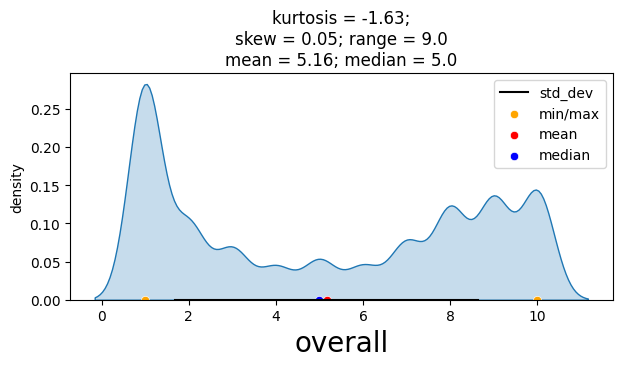

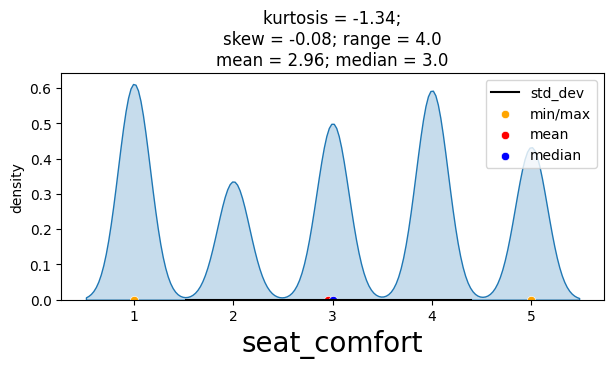

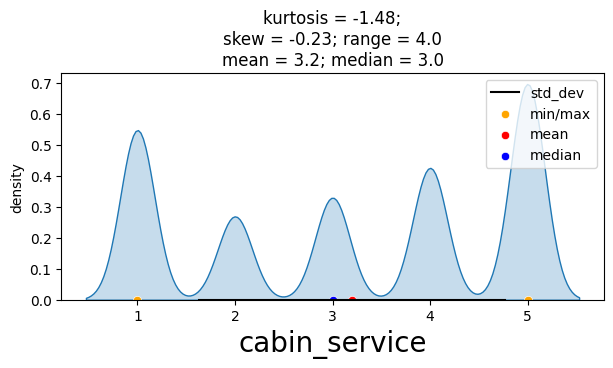

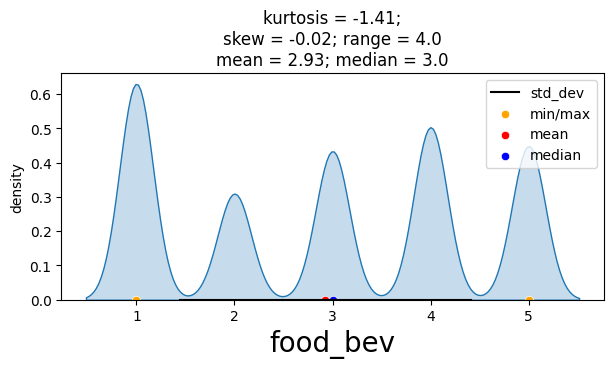

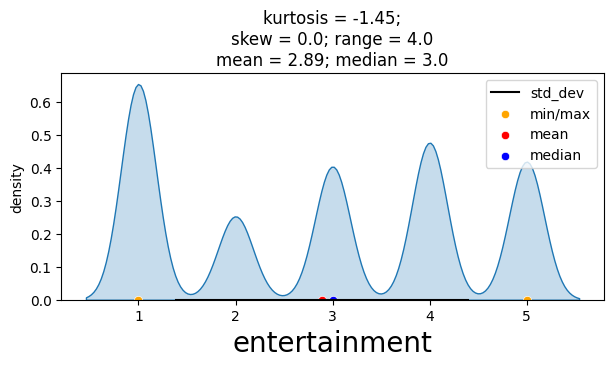

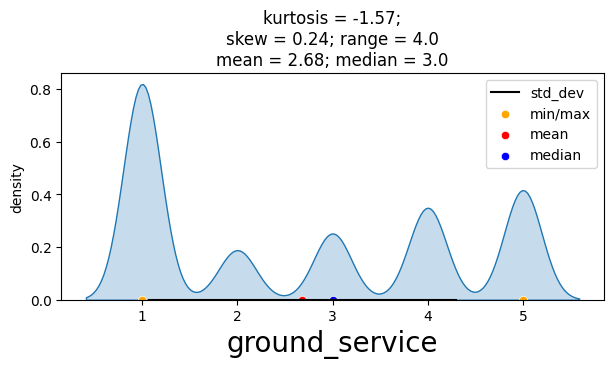

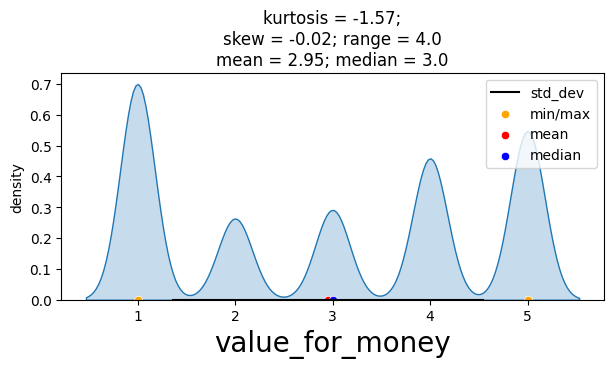

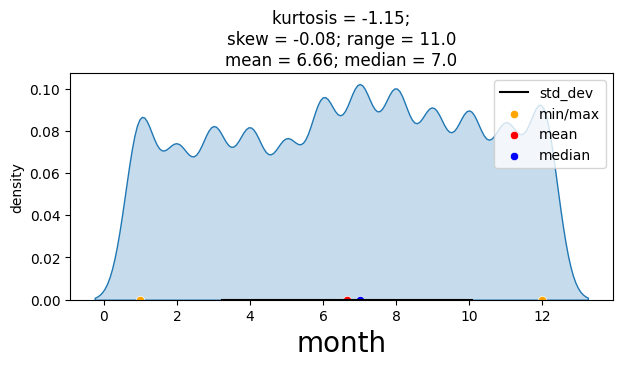

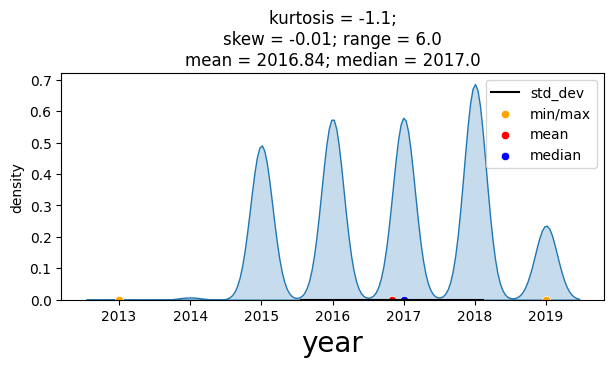

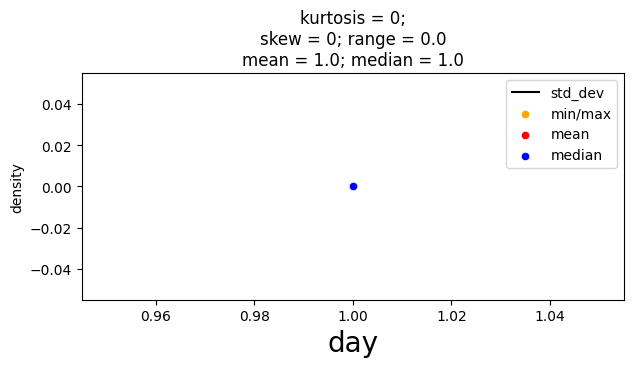

In [27]:
#Check distribution of all numerical features individually
for num in numerical_features:
  UVA_KDE(airlines_df,[num])

By using univariate analysis, we found:
* The range for the overall rating is from 1 to 10. It has mean value 5.15 and the median is 5.
* The distributions of the columns for seat comfort, cabin service, food beverages, entertainment, ground service, and value for money all contain multiple peaks, making them all multimodal variables. These features have a median of 3.
* The month feature's highest peak is 7. Later in our evaluation, we will analyse this feature again.
* With a mean year of 2016 and a median year of 2017, the year column spans from 2013 to 2019.

In [28]:
#We define a function to check the outliers in the dataset.
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

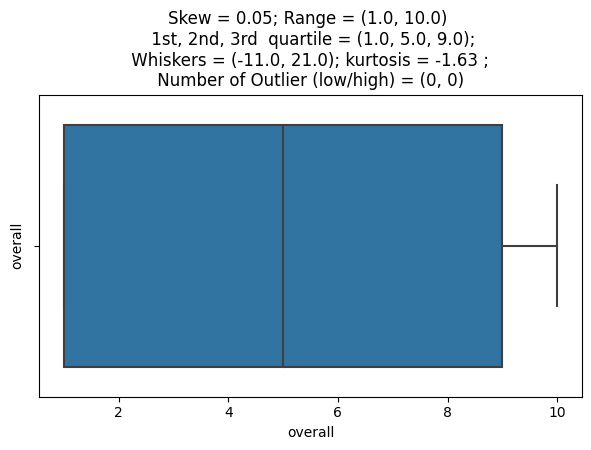

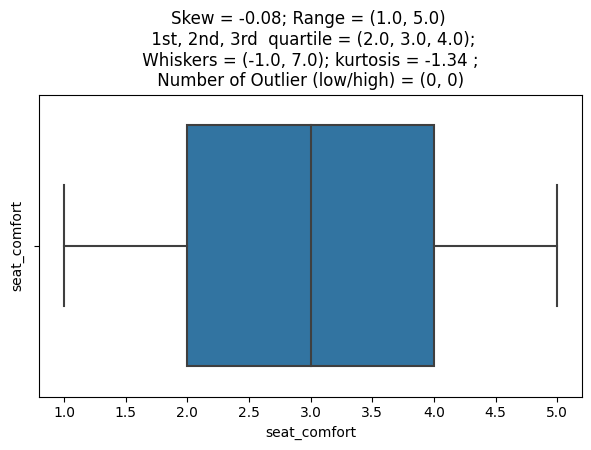

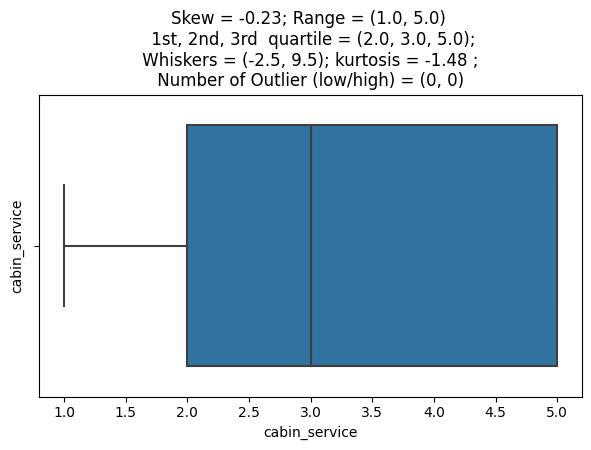

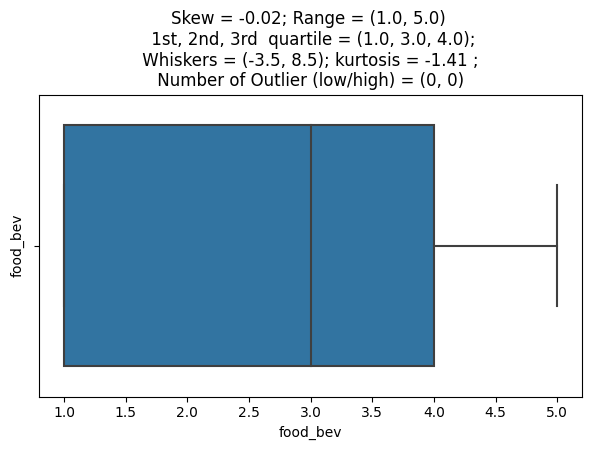

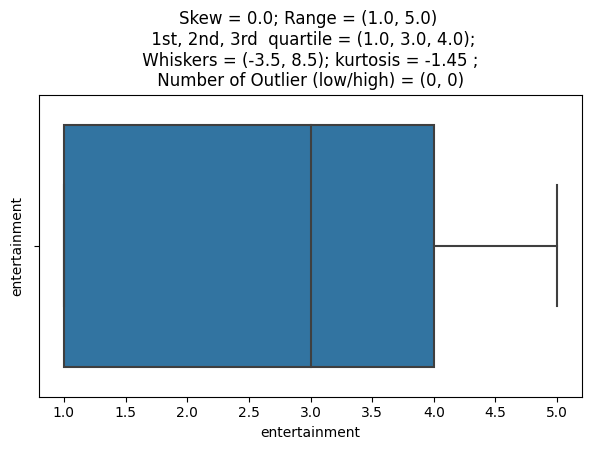

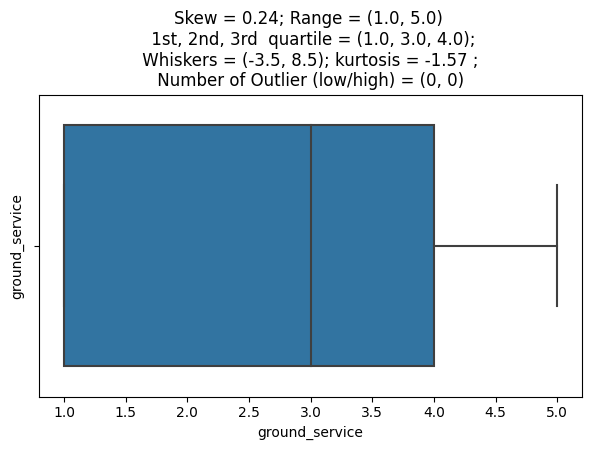

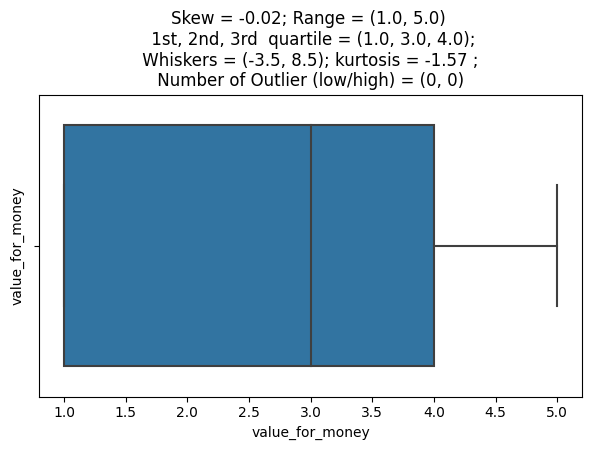

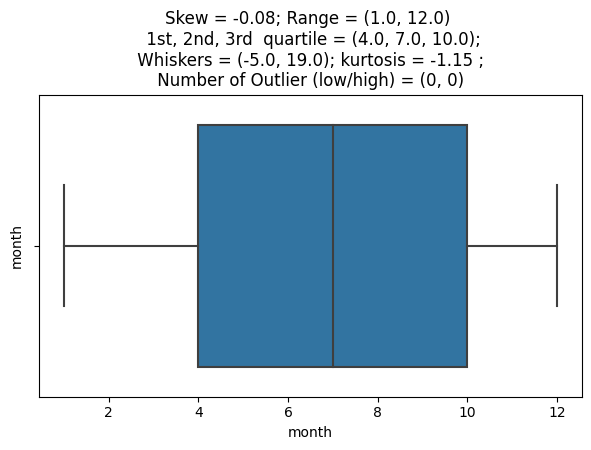

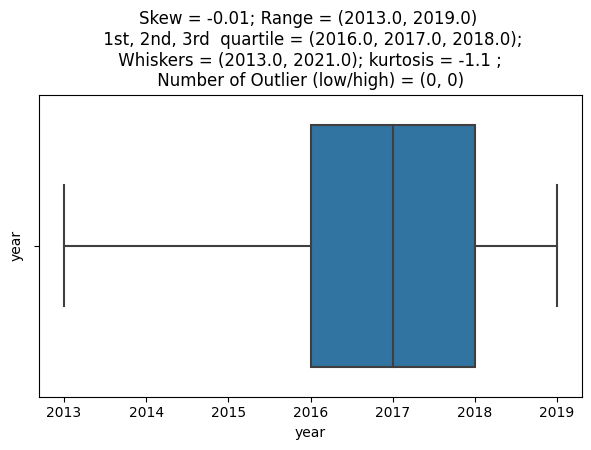

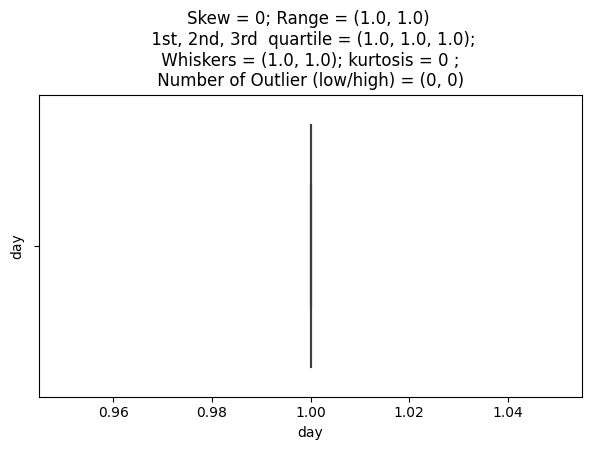

In [29]:
#Check the outliers with all numerical features individually.
for numb in numerical_features:
  UVA_boxplot(airlines_df,[numb])

##**Categorical features**:

##Top Airlines with maximum trips:

In [30]:
#Normalize the maximum number of trips on the basis of airline.
top_airlines= (airlines_df['airline'].value_counts(normalize = True)*100)[:10]
top_airlines_df = pd.DataFrame(top_airlines)
top_airlines_df

,airline
Spirit Airlines,4.692480
American Airlines,4.651619
United Airlines,4.533939
British Airways,4.463658
Emirates,2.881519
China Southern Airlines,2.809604
Frontier Airlines,2.651063
Ryanair,2.533383
Delta Air Lines,2.508867
Turkish Airlines,2.415704


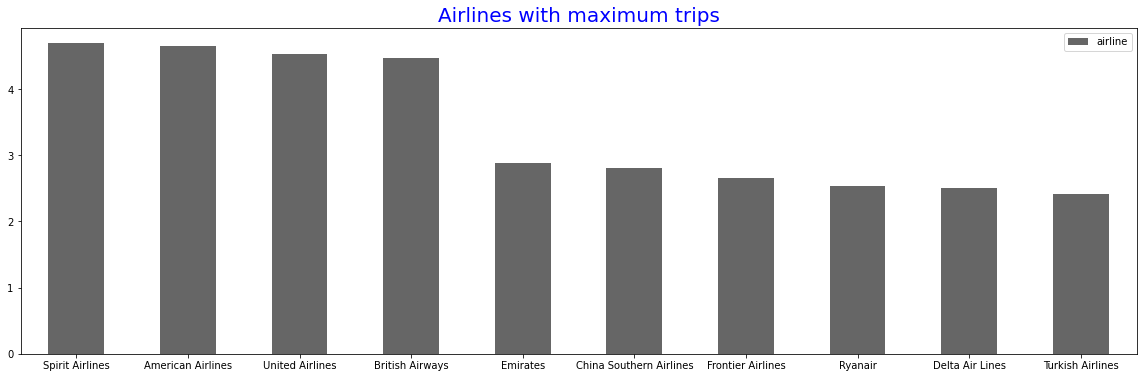

In [31]:
# Get the graphical representation of trips that each airline made.
top_airlines_df[:10].plot(kind='bar', colormap= 'Accent_r', figsize= (20,6) )
plt.title('Airlines with maximum trips', fontsize=20, color = 'blue')
plt.xticks(rotation= 0);

According to the above analysis, 
*	Spirit Airlines with maximum frequency in dataset holds holds the top spot for most journeys taken followed by American and United airlines.

##Top Aircrafts with maximum trips:

In [32]:
#Normalize the maximum number of trips on the basis of aircrafts.
top_aircraft= (airlines_df['aircraft'].value_counts(normalize = True)*100)[:10]
top_aircraft_df = pd.DataFrame(top_aircraft)
top_aircraft_df

,aircraft
A320,11.520987
A380,5.998486
Boeing 777,5.955214
Boeing 737-800,5.522501
A330,5.268282
Boeing 787,4.505625
Boeing 777-300ER,3.986370
A321,3.510385
Boeing 737,3.510385
A319,3.456296


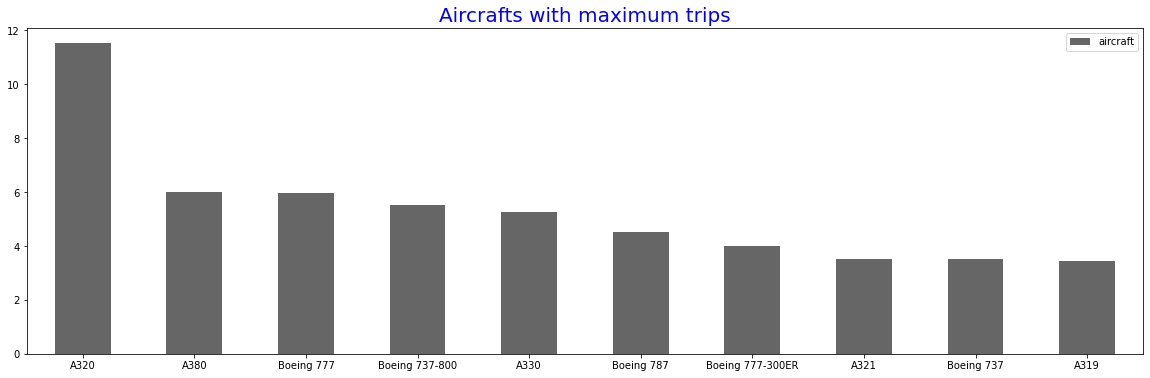

In [33]:
# Get the number of trips each airline make.
top_aircraft_df[:10].plot(kind='bar', colormap= 'Accent_r', figsize= (20,6) )
plt.title('Aircrafts with maximum trips', fontsize=20, color = 'blue')
plt.xticks(rotation= 0);

* According to the above analysis, Airbus A320 Aircraft with maximum frequency in dataset holds the top spot for most journeys taken followed by Boeing 777 and Airbus A380 aircraft.

##Top routes travelled across the world:

In [34]:
#Normalize the maximum number of trips on the basis of routes.
top_route= (airlines_df['route'].value_counts(normalize = True)*100)[:10]
top_route_df = pd.DataFrame(top_route)
top_route_df

,route
BKK to LHR,0.082638
LHR to JFK,0.079972
Vancouver to Toronto,0.074641
LHR to BKK,0.071975
Guangzhou to New York,0.069309
Bangkok to Hong Kong,0.066644
Singapore to Bangkok,0.063978
London to Bangkok,0.061312
Singapore to Sydney,0.061312
Jakarta to Singapore,0.061312


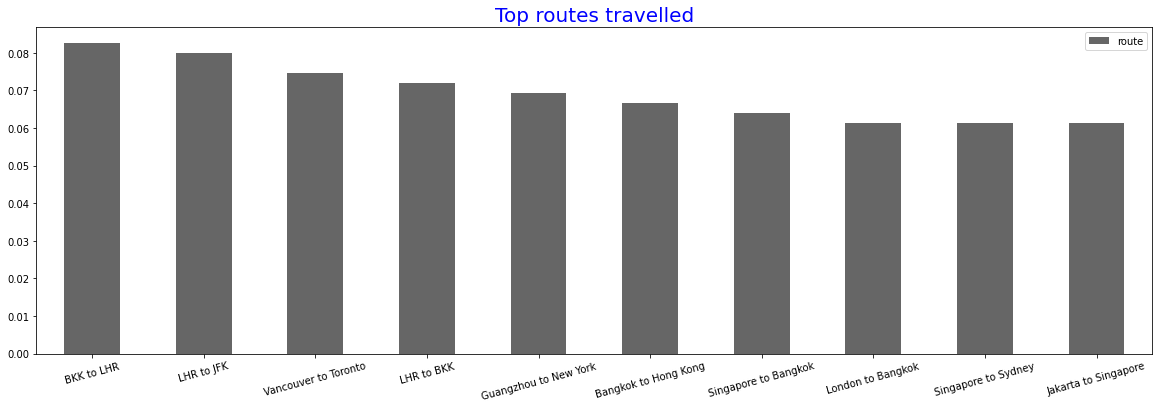

In [35]:
# Get the number of trips each airline make.
top_route_df[:10].plot(kind='bar', colormap= 'Accent_r', figsize= (20,6) )
plt.title('Top routes travelled', fontsize=20, color = 'blue')
plt.xticks(rotation= 15);

* According to the above analysis, Bangkok to Hong Kong journey with maximum frequency in dataset holds the tops position followed by Bangkok to London and London to New York.

##Month with the maximum number of trips travelled:

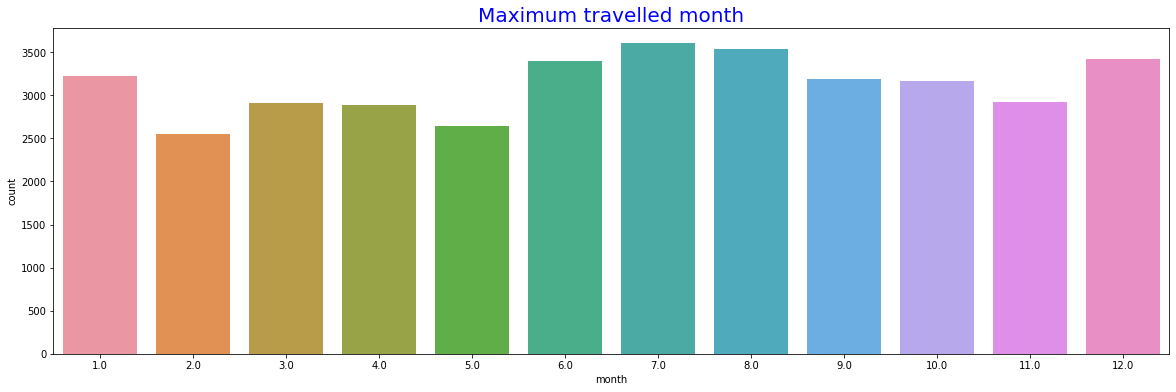

In [36]:
# Get countplot of 'month' feature
plt.figure(figsize=(20,6))
plt.title('Maximum travelled month', fontsize=20, color = 'blue')
sns.countplot(airlines_df['month']);

* The month of July is said to be the one with the highest travel. The second-most popular month for travel is December.

In [37]:
#Analyzing some of the remaining categorical features.
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,7), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

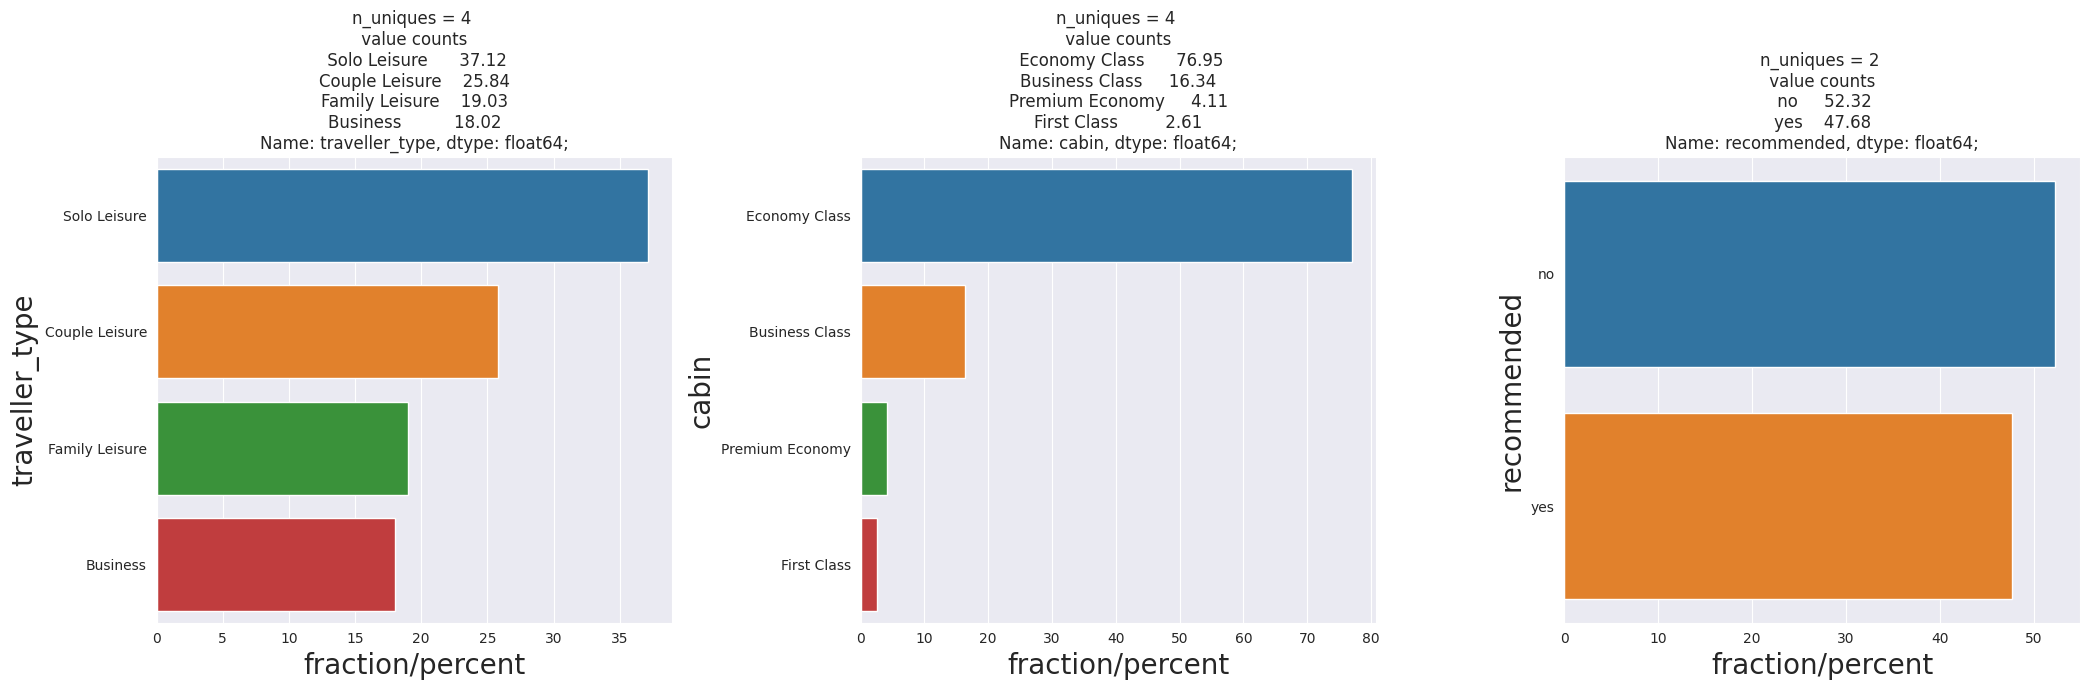

In [38]:
#traveller_type, cabin and recommended to be analyzed seperately for better visualization.
UVA_category(airlines_df,['traveller_type', 'cabin', 'recommended'])

* The three plots mentioned above made it easier for us to understand that the majority of travellers are Solo Leisure in travellers type column.
* For most passengers, the Economy class is the one they like in the cabin column.
* There is a slight variation between recommended and not recommended in the recommended column.

#**Bivariate Analysis**:

In [39]:
#We define a function to implement Bivariate Analysis.
from scipy.stats import chi2_contingency
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False
  n = 1
  plt.figure(figsize=(25,25))
  plt.subplot(4,2,n)
  n=n+1
  sns.countplot(x=cat, hue=tar, data=data)
  #plt.data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))
  plt.xticks(rotation=90)
  #annotate_horizontal(splot)
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

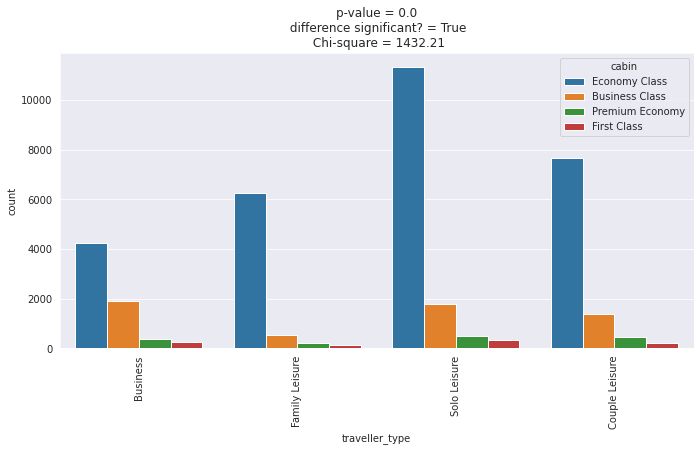

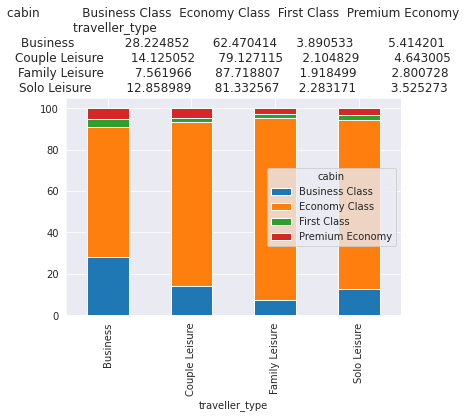

In [40]:
#Executing the bivariate analysis on traveller_type with cabin. 
BVA_categorical_plot(airlines_df,'cabin','traveller_type')

By using bivariate analysis we observed:
* All types of travellers strongly prefer the economy class.
* Some of the Business class and Couple Leisure people choose business class for travelling. 
* First class is least preferred among all traveller type categories.

#**Multivariate Analysis**:

In [41]:
#Ploting Pivot table for the Traveller_type and their preferred cabin to be Recommended or Not Recommended.
pd.pivot_table(airlines_df, index=['traveller_type', 'cabin'], columns='recommended', values='overall',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

recommended                        no    yes  TOTAL
traveller_type cabin                               
Business       Business Class     846   1062   1908
               Economy Class     2850   1373   4223
               First Class        135    128    263
               Premium Economy    203    163    366
Couple Leisure Business Class     508    861   1369
               Economy Class     5172   2497   7669
               First Class         98    106    204
               Premium Economy    242    208    450
Family Leisure Business Class     163    377    540
               Economy Class     4027   2237   6264
               First Class         63     74    137
               Premium Economy    130     70    200
Solo Leisure   Business Class     433   1358   1791
               Economy Class     6360   4967  11326
               First Class         76    242    318
               Premium Economy    197    294    491
TOTAL                           21503  16016  37519

In [42]:
#Compare the airline, number of customer_review and overall rating features for a detailed analysis
airlines_df.groupby('airline').agg({'customer_review':'count','overall':'sum'}).rename(columns={'customer_review': 'customer_review_count', 'overall': 'overall_score'}).sort_values(by= 'overall_score',ascending=False).reset_index()

,airline,customer_review_count,overall_score
0,British Airways,2731,13430.0
1,China Southern Airlines,1719,13277.0
2,Qatar Airways,1430,10702.0
3,Emirates,1763,10161.0
4,Lufthansa,1401,9290.0
...,...,...,...
76,flydubai,201,726.0
77,Adria Airways,85,421.0
78,Tunisair,71,289.0
79,Thai Smile Airways,48,282.0


* From above analysis, Cathay Pacific Airways of Hong Kong is the most liked airlines on the basis of their overall ratings.

#Highest overall ratings on the basis of aircrafts:

In [43]:
#Compare the airline, aircraft and overall rating features for a detailed analysis
airlines_df.groupby(['airline','aircraft']).agg({'overall':'sum'}).rename(columns={'overall': 'overall_score'}).sort_values(by= 'overall_score',ascending=False).reset_index()

,airline,aircraft,overall_score
0,Emirates,A380,2330.0
1,China Southern Airlines,A330,1781.0
2,Ryanair,Boeing 737-800,1553.0
3,British Airways,A320,1222.0
4,Aegean Airlines,A320,1192.0
...,...,...,...
4002,United Airlines,Boeing 737 and E145,1.0
4003,TAP Portugal,A320 and A330-200,1.0
4004,British Airways,Boeing 777 200/300,1.0
4005,Qatar Airways,Boeing777 / A319,1.0


* As a result of statistics showing, we were able to draw some interesting conclusions that Emirates Airlines' Airbus A380 is the most popular aircraft, However, based on the ratings given to all airlines, Emirates Airlines is not the most popular airline.

#Airlines recent 5 year trend:

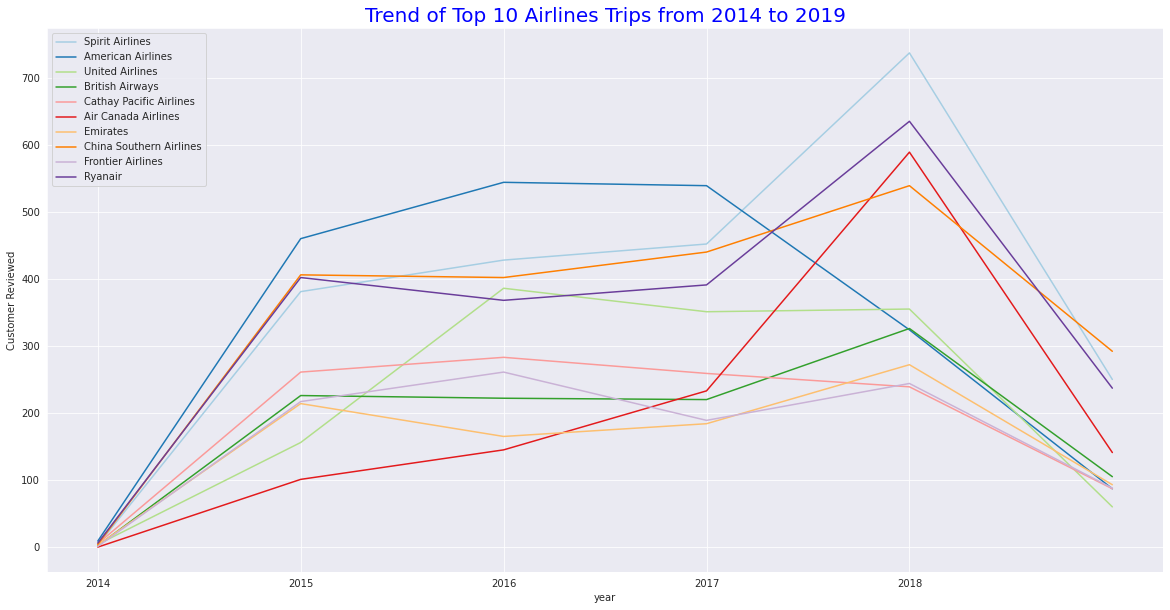

In [44]:
#Determining the last 5 year trend of airlines.
groups_10 = airlines_df[airlines_df.airline.isin(airlines_df.airline.value_counts()[:10].index)]
pd.crosstab(groups_10.year, groups_10.airline).plot(color=sns.color_palette('Paired', 10))
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(range(2014, 2019, 1))
plt.ylabel('Customer Reviewed')
plt.title('Trend of Top 10 Airlines Trips from 2014 to 2019', fontsize=20, color = 'blue')
plt.legend(labels=['Spirit Airlines',
                   'American Airlines',
                   'United Airlines',
                   'British Airways',
                   'Cathay Pacific Airlines',
                   'Air Canada Airlines',
                   'Emirates',
                   'China Southern Airlines',
                   'Frontier Airlines',
                   'Ryanair'], loc='upper left')
plt.show()

The above graph shows the number of customers reviewed airlines in last 5 years:
* In its initial days American airlines was at low, but in 2018 it reaches to its all time peak and become top preferred airlines for their operations.
* United airlines of USA retained their top position from 2014 to 2017, then its number of reviews degraded further.
* Emirates airlines was least preffered in its initial days, but it increased its customer base in 2018 and retained their place in top 3 airlines.
* We have also analyzed above that spirit airlines is least preferred by travellers, However we can also see that in the above trend graph.

#Examine the customer review column:

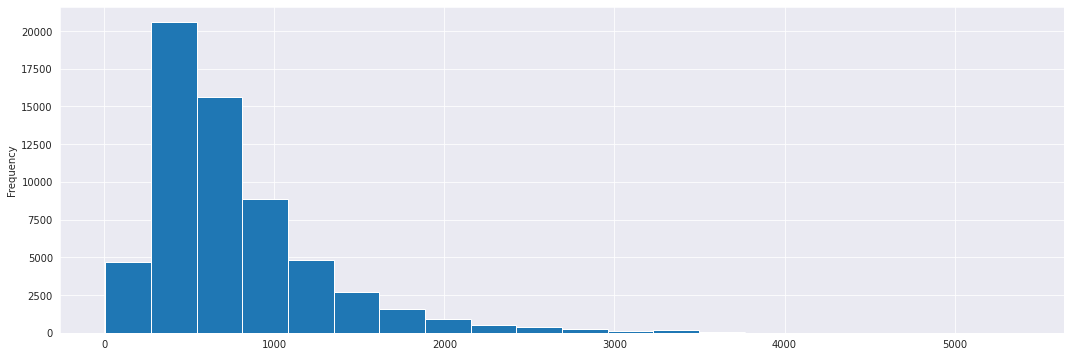

In [45]:
#Add new column 'length'
airlines_df['length'] = airlines_df['customer_review'].apply(len)
#Check distribution of length column of each customer's review
airlines_df['length'].plot(kind = 'hist', bins = 20, figsize = (18,6));

* Hence, above graph is right skewed which tells us that the length of customer reviews is mostly between 1 to 1000 words.

#**Multicollinearity**:

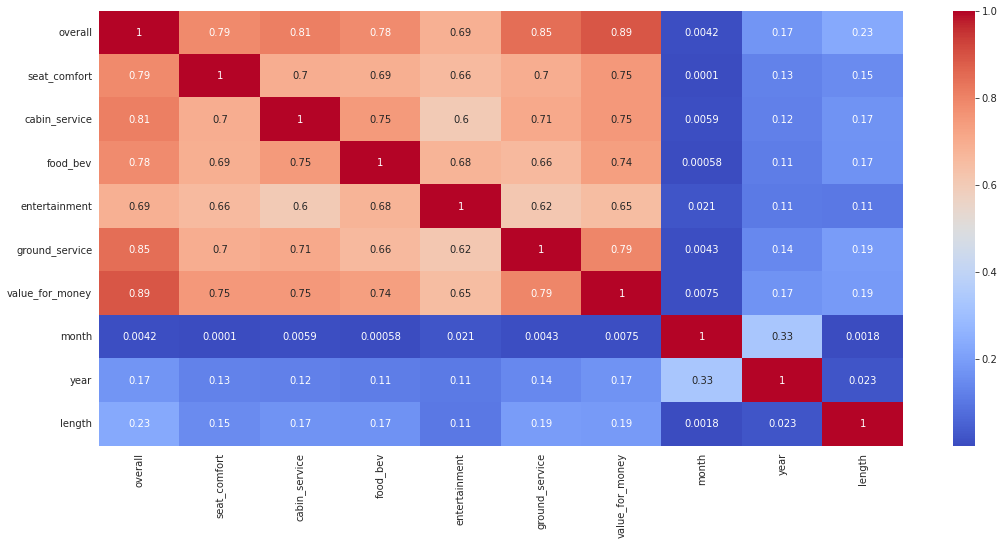

In [46]:
#Check multicollinearity among all independent variables
plt.figure(figsize=(18,8))
correlation =abs( airlines_df.drop('day',axis=1).corr())
sns.heatmap(correlation, annot=True, cmap='coolwarm');

In above heatmap:
* We can observe that a lot of rating variables have strongly correlated with the overall rating column. Therefore, we may ignore the remaining correlated columns and focus just on the overall column in order to optimize our analysis.

#**Data Pre-processing**:

##**In order to perform sentiment analysis with our NLP model, we will only focus on three columns that are recommended, overall and customer reviews in our analysis ahead.**

##Preparing data for NLP models:

In [47]:
#Check null values of target variable where overall ratings given
(airlines_df['recommended'].isnull() & airlines_df['overall'].notna()).sum()

1404

In [48]:
#Create new dataframe where recommended column have null values but overall ratings were given
df2 = airlines_df[airlines_df['recommended'].isnull()]
df2.head(3)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,month,year,day,length
32,Turkish Airlines,1.0,Deepa Acharya,6th April 2019,âœ… Trip Verified | Lagos to Istanbul via Kath...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,629
76,Turkish Airlines,1.0,B Marten,7th February 2019,âœ… Trip Verified | Seychelles to Birmingham v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469
104,Turkish Airlines,8.0,David Jackson,8th January 2019,âœ… Trip Verified | London to Bangkok via Ista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213


In [49]:
#Fill recommended column null values based on overall ratings given
df2.loc[df2["overall"] <= 5.0, "recommended"] = 'no'
df2.loc[df2["overall"] > 5.0, "recommended"] = 'yes'

In [50]:
df2.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,month,year,day,length
32,Turkish Airlines,1.0,Deepa Acharya,6th April 2019,âœ… Trip Verified | Lagos to Istanbul via Kath...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,629
76,Turkish Airlines,1.0,B Marten,7th February 2019,âœ… Trip Verified | Seychelles to Birmingham v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,469
104,Turkish Airlines,8.0,David Jackson,8th January 2019,âœ… Trip Verified | London to Bangkok via Ista...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,213
105,Turkish Airlines,1.0,Gordon Turpin,8th January 2019,âœ… Trip Verified | At check-in in Johannesbur...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,803
130,Turkish Airlines,1.0,Omid Ziaee,28th November 2018,âœ… Trip Verified | San Francisco to Mashhad v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,527


In [51]:
#Concate df2 and original dataframe together
frames = [airlines_df,df2]
airlines_df = pd.concat(frames,)

In [52]:
#Check info before removal of remaining null values
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62605 entries, 0 to 65895
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          62605 non-null  object 
 1   overall          60805 non-null  float64
 2   author           62605 non-null  object 
 3   review_date      62605 non-null  object 
 4   customer_review  62605 non-null  object 
 5   aircraft         18489 non-null  object 
 6   traveller_type   37541 non-null  object 
 7   cabin            58706 non-null  object 
 8   route            37514 non-null  object 
 9   seat_comfort     56211 non-null  float64
 10  cabin_service    56240 non-null  float64
 11  food_bev         48341 non-null  float64
 12  entertainment    40230 non-null  float64
 13  ground_service   37169 non-null  float64
 14  value_for_money  59327 non-null  float64
 15  recommended      61165 non-null  object 
 16  month            37434 non-null  float64
 17  year        

In [53]:
# Remove the Null and duplicate values
airlines_df.dropna(how = 'all',subset = ['recommended'],inplace = True)
#Reset index of Dataframe.
airlines_df.reset_index(drop= 'index', inplace = True)

In [54]:
#Check info after removal of remaining null values
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61165 entries, 0 to 61164
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61165 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61165 non-null  object 
 3   review_date      61165 non-null  object 
 4   customer_review  61165 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   seat_comfort     56211 non-null  float64
 10  cabin_service    56240 non-null  float64
 11  food_bev         48341 non-null  float64
 12  entertainment    40230 non-null  float64
 13  ground_service   37169 non-null  float64
 14  value_for_money  59327 non-null  float64
 15  recommended      61165 non-null  object 
 16  month            37434 non-null  float64
 17  year        

In [55]:
#Duplicate values in target variable
len(airlines_df.loc[airlines_df['recommended'] != airlines_df['recommended'] ])

0

#**Natural Language Processing**:

In [56]:
#Create new dataframe for building NLP model
df = airlines_df[['customer_review','recommended']]

In [57]:
#Check info of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61165 entries, 0 to 61164
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_review  61165 non-null  object
 1   recommended      61165 non-null  object
dtypes: object(2)
memory usage: 955.8+ KB


##**Import neccessary libraries for NLP**:

In [58]:
# import re for regularExpression
# importing natural language toolkit
import re
import nltk
import string
# import pos_tag for removal of parts of speech
from nltk import pos_tag
# importing stopwords from nitk corpus
from nltk.corpus import stopwords
from nltk.corpus import wordnet
# download important nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [59]:
# import wordnet lemmatizer to remove insignificant words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [60]:
# Returning the wordnet object value corresponding to the POS tag
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def text_cleaning(data):

  # Remove single characters from the start
  processed_feature = re.sub('[^a-zA-Z]', ' ', data) 

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()

  processed_feature = processed_feature.split(' ')
  
   # removing stopword
  stop_words=set(stopwords.words('english'))
  stop_words.remove('not')
  processed_feature = [i for i in processed_feature if i not in stop_words]

  # pos tag text
  pos_tags = pos_tag(processed_feature)

  # using lemmatization on words
  processed_feature = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
  # remove words with only two letter
  processed_feature = [t for t in processed_feature if len(t) > 2]

   # join all
  processed_feature = ' '.join(processed_feature)
  return processed_feature

**Text cleaning** is the process of preparing raw text for NLP (Natural Language Processing) so that machines can understand human language.
Following approach is used here to clean the text of customer reviews:
* **Use pos_tag with nltk**:- POS Tagging in NLTK is a process to mark up the words in text format for a particular part of a speech based on its definition and context. 
* Remove all character which are excluded from "**a-z and A-Z**".
* Convert words into **Lowercase** and **split** them through space.
* Remove **stopwords** using **nltk** library.
* Lemmatization of reviews and get the meaningful words using **WordNetLemmatizer**.
* **Join** back the words that were split before.
* Initiate **tokenization** process.

In [61]:
# creating token of words with the help of text cleaning function
df['tokenized_review'] = df['customer_review'].apply(text_cleaning)

In [62]:
len(df['customer_review'][1])

467

In [63]:
len(df['tokenized_review'][1])

270

In [64]:
df =df.reset_index(drop= ['index'])
df

,customer_review,recommended,tokenized_review
0,âœ… Trip Verified | London to Izmir via Istanb...,yes,trip verify london izmir via istanbul first ti...
1,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,trip verify istanbul bucharest make check airp...
2,âœ… Trip Verified | Rome to Prishtina via Ista...,no,trip verify rome prishtina via istanbul fly co...
3,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,trip verify flew turkish airline iad ist khi r...
4,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,trip verify mumbai dublin via istanbul never b...
...,...,...,...
61160,âœ… Trip Verified | Kiev to Riga. 24 hrs befor...,no,trip verify kiev riga flight get notification ...
61161,âœ… Verified Review | Flew Ukraine Internation...,no,verify review fly ukraine international kiev a...
61162,We travelled Ukraine International from London...,no,travelled ukraine international london gatwick...
61163,DXB-KBP-LGW. Both planes were 737-800s but the...,yes,dxb kbp lgw plane seat not identical dubai kie...


##**Modeling**

In [65]:
#Text Vecorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=6000)

In [66]:
df['recommended'] = df['recommended'].replace({'yes': 1, 'no': 0})

In [67]:
#Input and Output Features
X = tfidf.fit_transform(df['tokenized_review']).toarray()
y = df['recommended'].values

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [70]:
#Imports Lib
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [71]:
import time
# Importing  metrics for evaluation for our models
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [72]:
#Declare the models
lr_model=LogisticRegression()
pac_model=PassiveAggressiveClassifier()
gb_model = GradientBoostingClassifier(n_estimators = 50,max_depth = 6,min_samples_split = 10,min_samples_leaf = 30)
rf_model=RandomForestClassifier()
gnb_model = GaussianNB()
Mnb_model=MultinomialNB()


#Create a list of models
models=[lr_model,pac_model,gb_model,gnb_model,Mnb_model,rf_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #Compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'MOdel_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [73]:
# Get performance matrix dataframe for different classifiers.
final_result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

In [74]:
#  Get performance on different models
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,MOdel_training_time
0,LogisticRegression,92.52,90.72,92.69,91.14,91.54,89.11,92.48,90.64,0.906442,10.170054
1,PassiveAggressiveClassifier,94.76,88.57,95.02,88.94,93.94,86.70,94.72,88.48,0.884816,18.182949
2,GradientBoostingClassifier,88.54,86.19,89.06,86.54,86.61,83.96,88.46,86.09,0.860854,720.558060
3,GaussianNB,82.79,79.01,78.61,75.20,87.81,83.21,83.01,79.21,0.792105,1.868579
4,MultinomialNB,86.12,84.80,83.91,82.65,87.72,86.05,86.19,84.86,0.848636,0.422809
5,RandomForestClassifier,100.00,87.96,99.99,87.21,100.00,87.46,100.00,87.93,0.879348,96.484325


In [75]:
#Check f1 score for the test data
y_pred=lr_model.predict(X_test)
f1_score=f1_score(y_test,y_pred)
print(round(f1_score*100,2))

90.12


In [76]:
#  Get confusion matrix on different train models
for model,matrix in dct_train.items():
  print('The test confusion matrix of \033[1m{}\033[0m is :'.format(model),'\n',matrix,'\n','-'*50)


The test confusion matrix of LogisticRegression is : 
 [[23909  1686]
 [ 1974 21363]] 
 --------------------------------------------------
The test confusion matrix of PassiveAggressiveClassifier is : 
 [[24446  1149]
 [ 1415 21922]] 
 --------------------------------------------------
The test confusion matrix of GradientBoostingClassifier is : 
 [[23113  2482]
 [ 3125 20212]] 
 --------------------------------------------------
The test confusion matrix of GaussianNB is : 
 [[20019  5576]
 [ 2845 20492]] 
 --------------------------------------------------
The test confusion matrix of MultinomialNB is : 
 [[21670  3925]
 [ 2866 20471]] 
 --------------------------------------------------
The test confusion matrix of RandomForestClassifier is : 
 [[25593     2]
 [    0 23337]] 
 --------------------------------------------------


In [77]:
#  Get confusion matrix on different test models
for model,matrix in dct_test.items():
  print('The test confusion matrix of \033[1m{}\033[0m is :'.format(model),'\n',matrix,'\n','-'*50)

The test confusion matrix of LogisticRegression is : 
 [[5924  503]
 [ 632 5174]] 
 --------------------------------------------------
The test confusion matrix of PassiveAggressiveClassifier is : 
 [[5801  626]
 [ 772 5034]] 
 --------------------------------------------------
The test confusion matrix of GradientBoostingClassifier is : 
 [[5669  758]
 [ 931 4875]] 
 --------------------------------------------------
The test confusion matrix of GaussianNB is : 
 [[4834 1593]
 [ 975 4831]] 
 --------------------------------------------------
The test confusion matrix of MultinomialNB is : 
 [[5378 1049]
 [ 810 4996]] 
 --------------------------------------------------
The test confusion matrix of RandomForestClassifier is : 
 [[5682  745]
 [ 728 5078]] 
 --------------------------------------------------


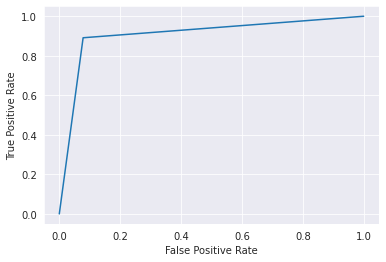

In [78]:
#Predict the probability
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr,tpr, _ = roc_curve(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##**Let us check our model performance on some data that is randomly created**:

In [79]:
#Import pipeline to reduce complexity of our code
from sklearn.pipeline import Pipeline

In [80]:
#Convert binary numbers into text
df['recommended'] = df['recommended'].replace({1: 'yes', 0: 'no'})

In [81]:
### defining Independent variable
X = df.tokenized_review

In [82]:
## defining dependent variable
y = df.recommended

In [83]:
#Split data into test-train without changing the text format
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [84]:
#Implement pipeline with vectorizer and selected model
model = Pipeline([('vectorizer',tfidf),('classifier',gb_model)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=6000)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=6, min_samples_leaf=30,
                                            min_samples_split=10,
                                            n_estimators=50))])

In [85]:
#Create random list of reviews and predict the dependent variable
reviews = ['it was an average flight but facilites can be better ','I had a great experience','hospitality are good',
         'seats were  good', 'he is not satisfied',
        'he is angry with staff behaviour', 'There was clean food available', 'The flight was cancelled twice, flew with another airline','bigger boarding wa time orderly seat seemed new private opinion','Experience was not good']
result = model.predict(reviews)

df1 = pd.DataFrame({'Reviews': reviews, 'Recommended': result })
df1

,Reviews,Recommended
0,it was an average flight but facilites can be ...,no
1,I had a great experience,yes
2,hospitality are good,yes
3,seats were good,yes
4,he is not satisfied,no
5,he is angry with staff behaviour,no
6,There was clean food available,yes
7,"The flight was cancelled twice, flew with anot...",no
8,bigger boarding wa time orderly seat seemed ne...,yes
9,Experience was not good,yes
